# Task 1: Performing Linear Regression to predict percentage scores based on number of hours studied

In [1]:
# importing libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [2]:
#import data
link = "http://bit.ly/w-data"
data = pd.read_csv(link)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#check for any missing values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [4]:
#descriptive statistics on data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


From above, we can infer that:
1) Average number of hours a student studies is around 5, lowest is 1 hour and maximum is 9 hours.
2) Average percentage score is around 51, lowest score is 17 and highest is 95.

# Exploratory Analysis

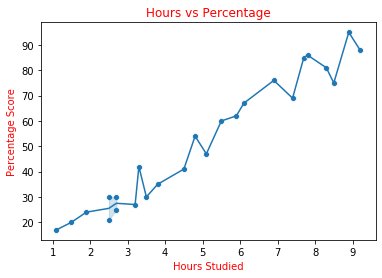

In [5]:
#simple visualization of data
from seaborn import scatterplot, lineplot
scatterplot(x='Hours', y='Scores', data=data)
lineplot(x='Hours', y='Scores', data=data)
plt.title('Hours vs Percentage', color='red')  
plt.xlabel('Hours Studied', color='red')  
plt.ylabel('Percentage Score', color='red') 
# show plot
plt.show()

Here, we observe that there exists a positive linear relation between number of hours studied and percentage scored.

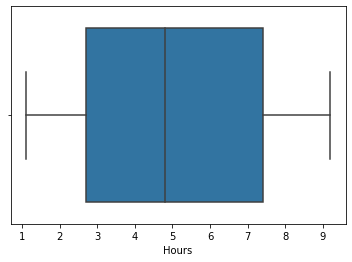

In [6]:
#To check for outliers
from seaborn import boxplot
boxplot(x='Hours', data=data)
# show plot
plt.show()

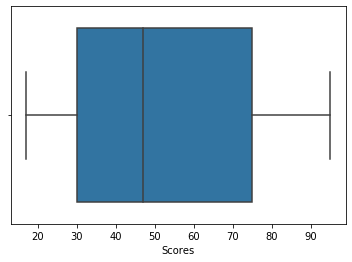

In [7]:
boxplot(x='Scores', data=data)
# show plot
plt.show()

No outliers in the data

# Splitting data into train and test sets

In [8]:
#Dividing into predictors and output variable

X = np.array(data['Hours']).reshape(-1, 1) 
y = np.array(data['Scores']).reshape(-1, 1)
#splitting into training and testing data in 75:25 ratio respectively
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.25, random_state=0) 

In [9]:
#checking shape of both train and test data for both variables
print(X_train.shape,y_train.shape)
print(X_test.shape, y_test.shape)

(18, 1) (18, 1)
(7, 1) (7, 1)


# Linear Regression

In [10]:
data_reg = LinearRegression()  
data_reg.fit(X_train, y_train) 
 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

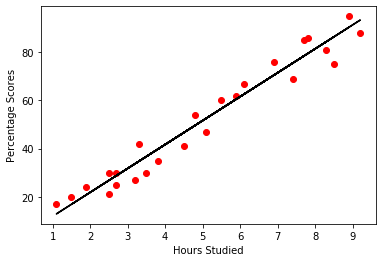

In [12]:
y_slope = data_reg.coef_*X+data_reg.intercept_ 
plt.scatter(X, y, color ='r') 
plt.plot(X, y_slope, color ='k') 
plt.xlabel('Hours Studied') 
plt.ylabel('Percentage Scores')
plt.show() 


# Testing the data and Actual vs Predicted values check

In [13]:
y_pred = data_reg.predict(X_test)
df=pd.DataFrame({'Actual': y_test.reshape(-1,), 'Predicted': y_pred.reshape(-1,)})
df


,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


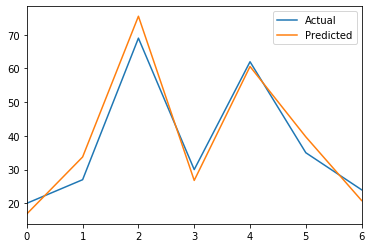

In [14]:
df.plot(kind='line')
plt.legend()


Evaluating Model Accuracy

In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.130879918502486


In [16]:
from sklearn.metrics import r2_score
print('R squared:',
      r2_score(y_test, y_pred))

R squared: 0.9367661043365055


Model has an accuracy of about 93 %. 

# Predicting with own data

In [17]:
hours = 8.5
own_pred = data_reg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0].round(2)))

No of Hours = 8.5
Predicted Score = [86.44]


# LASSO Regression

In [18]:
data_lasso = Lasso(alpha=1,random_state = 0)
data_lasso.fit(X_train,y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.0001, warm_start=False)

In [19]:
lasso_pred = data_lasso.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test.reshape(-1,), 'Predicted': lasso_pred.reshape(-1,)})  
df1

,Actual,Predicted
0,20,17.505768
1,27,34.126066
2,69,75.187979
3,30,27.282414
4,62,60.523010
5,35,39.992054
6,24,21.416427


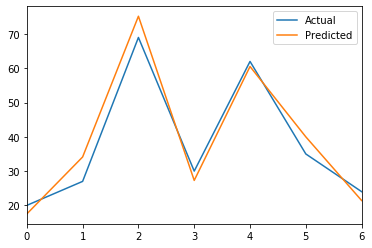

In [20]:
df1.plot(kind='line')
plt.legend()

# Predicting with own data

In [21]:
hours = 6
own_pred = data_lasso.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0].round(2)))

No of Hours = 6
Predicted Score = 61.5
